In [1]:
import requests
import pandas as pd
import numpy as np
import re
import time
import random

import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords

from sklearn.model_selection import train_test_split

from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer, TfidfVectorizer 
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split 
from sklearn.metrics import classification_report
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

import itertools

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import seaborn as sns

### 3.01 - API Scraping

In [2]:
url = 'https://www.reddit.com/r/nosleep.json'
res = requests.get(url, headers={'User-agent': 'Mozilla/4.0'})

In [3]:
res.status_code

200

In [4]:
dict1 = res.json()
dict1.keys()

dict_keys(['kind', 'data'])

In [5]:
dict1['kind']

'Listing'

In [6]:
dict1['data'].keys()

dict_keys(['modhash', 'dist', 'children', 'after', 'before'])

In [7]:
dict1['data']['children']

[{'kind': 't3',
  'data': {'approved_at_utc': None,
   'subreddit': 'nosleep',
   'selftext': '',
   'author_fullname': 't2_9ecvi',
   'saved': False,
   'mod_reason_title': None,
   'gilded': 0,
   'clicked': False,
   'title': 'June Contest Nominations',
   'link_flair_richtext': [],
   'subreddit_name_prefixed': 'r/nosleep',
   'hidden': False,
   'pwls': 6,
   'link_flair_css_class': None,
   'downs': 0,
   'hide_score': False,
   'name': 't3_cgwku7',
   'quarantine': False,
   'link_flair_text_color': 'dark',
   'author_flair_background_color': None,
   'subreddit_type': 'public',
   'ups': 168,
   'total_awards_received': 0,
   'media_embed': {},
   'author_flair_template_id': '0637253e-f26a-11e2-acf7-12313b0eb082',
   'is_original_content': False,
   'user_reports': [],
   'secure_media': None,
   'is_reddit_media_domain': False,
   'is_meta': False,
   'category': None,
   'secure_media_embed': {},
   'link_flair_text': None,
   'can_mod_post': False,
   'score': 168,
   'appro

In [8]:
len(dict1['data']['children'])

26

In [9]:
dict1['data']['children'][0]['data']['title']

'June Contest Nominations'

In [10]:
dict1['data']['children'][0]['data']['selftext']

''

In [11]:
posts1 = [p['data'] for p in dict1['data']['children']] 
pd.DataFrame(posts1)

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,...,thumbnail,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],True,None,None,False,EtTuTortilla,None,None,[],0637253e-f26a-11e2-acf7-12313b0eb082,...,,June Contest Nominations,0,168,https://www.reddit.com/r/NoSleepOOC/comments/c...,[],None,False,all_ads,6
1,"[{'is_enabled': True, 'count': 1, 'subreddit_i...",True,None,None,False,RichardSaxon,None,None,[],None,...,,I Want to Keep Falling,1,1517,https://www.reddit.com/r/nosleep/comments/csvf...,[],None,False,all_ads,6
2,[],True,None,None,False,Colourblindness,None,None,[],None,...,,The Mooncreek Matinee has been closed for over...,0,246,https://www.reddit.com/r/nosleep/comments/csys...,[],None,False,all_ads,6
3,[],False,None,None,False,Mr_Outlaw_,None,None,[],None,...,,I'm a guard stationed at a 'secret' government...,0,65,https://www.reddit.com/r/nosleep/comments/ct27...,[],None,False,all_ads,6
4,"[{'is_enabled': True, 'count': 1, 'subreddit_i...",True,None,None,False,pennytailsup,None,None,[],None,...,,My daughter likes to play pretend with her own...,1,884,https://www.reddit.com/r/nosleep/comments/csqd...,[],None,False,all_ads,6
5,[],True,None,None,False,rikndikndakn123,None,None,[],None,...,,Why I'm never going camping again,0,153,https://www.reddit.com/r/nosleep/comments/csvv...,[],None,False,all_ads,6
6,[],True,None,None,False,fainting--goat,None,None,[],None,...,,My anger was surgically removed,0,791,https://www.reddit.com/r/nosleep/comments/csps...,[],None,False,all_ads,6
7,[],True,None,None,False,Jullzz15,None,None,[],None,...,,Be careful clicking on pop-up ads,0,52,https://www.reddit.com/r/nosleep/comments/cszc...,[],None,False,all_ads,6
8,[],True,None,None,False,rhonnie14,None,None,[],None,...,,I Found A Disturbing Note In My Middle School ...,0,76,https://www.reddit.com/r/nosleep/comments/csww...,[],None,False,all_ads,6
9,[],False,None,None,False,gothamcitynarrows,None,None,[],None,...,,"Two years ago, my family went missing. Now I t...",0,28,https://www.reddit.com/r/nosleep/comments/cszm...,[],None,False,all_ads,6


In [12]:
dict1['data']['after']

't3_csyxhi'

In [13]:
pd.DataFrame(posts1)['name']

0     t3_cgwku7
1     t3_csvf2p
2     t3_csys4j
3     t3_ct27tk
4     t3_csqddx
5     t3_csvvmw
6     t3_cspsv4
7     t3_cszch5
8     t3_csww13
9     t3_cszm3g
10    t3_ct2485
11    t3_cssthq
12    t3_csgu9c
13    t3_cszrcn
14    t3_cssvt7
15    t3_cslncw
16    t3_ct26g1
17    t3_ct1f8w
18    t3_csyii2
19    t3_cst6ly
20    t3_csmgbg
21    t3_ct2zrf
22    t3_csk6mk
23    t3_csyr8y
24    t3_csw1cy
25    t3_csyxhi
Name: name, dtype: object

In [14]:
url + '?after=' + dict1['data']['after']

'https://www.reddit.com/r/nosleep.json?after=t3_csyxhi'

In [15]:
len(posts1)

26

In [16]:
posts1 = []
after = None

for a in range(35):
    if after == None:
        current_url = url
    else:
        current_url = url + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'Mozilla/4.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts1.extend(current_posts)
    after = current_dict['data']['after']
    
    if a > 0:
        prev_posts = pd.read_csv('nosleep.csv')  
        current_df = pd.DataFrame(posts1) 
        
    else:
        pd.DataFrame(posts1).to_csv('nosleep.csv', index = False) 
       
    sleep_duration = random.randint(5,30)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/nosleep.json
18
https://www.reddit.com/r/nosleep.json?after=t3_csyxhi
23
https://www.reddit.com/r/nosleep.json?after=t3_csnqb4
7
https://www.reddit.com/r/nosleep.json?after=t3_cs5kuf
6
https://www.reddit.com/r/nosleep.json?after=t3_csh0oi
16
https://www.reddit.com/r/nosleep.json?after=t3_crrq3y
19
https://www.reddit.com/r/nosleep.json?after=t3_crni64
16
https://www.reddit.com/r/nosleep.json?after=t3_crqq2k
29
https://www.reddit.com/r/nosleep.json?after=t3_crdesi
28
https://www.reddit.com/r/nosleep.json?after=t3_cqr218
20
https://www.reddit.com/r/nosleep.json?after=t3_cqyi7n
18
https://www.reddit.com/r/nosleep.json?after=t3_cqho19
6
https://www.reddit.com/r/nosleep.json?after=t3_cqlt3j
18
https://www.reddit.com/r/nosleep.json?after=t3_cq2d2r
30
https://www.reddit.com/r/nosleep.json?after=t3_cq7l8z
8
https://www.reddit.com/r/nosleep.json?after=t3_cpejw0
14
https://www.reddit.com/r/nosleep.json?after=t3_cpm8z0
6
https://www.reddit.com/r/nosleep.json?after=t3_cotrm

In [17]:
pd.DataFrame(posts1).to_csv('nosleep_posts.csv') 

In [18]:
len(posts1)

854

In [19]:
url1 = 'https://www.reddit.com/r/Anxiety.json'
res = requests.get(url1, headers={'User-agent': 'Mozilla/4.0'})

In [20]:
dict2 = res.json()
dict2.keys()

dict_keys(['kind', 'data'])

In [21]:
posts2 = [p['data'] for p in dict2['data']['children']] 

In [22]:
pd.DataFrame(posts2)

,all_awardings,allow_live_comments,approved_at_utc,approved_by,archived,author,author_flair_background_color,author_flair_css_class,author_flair_richtext,author_flair_template_id,...,thumbnail_width,title,total_awards_received,ups,url,user_reports,view_count,visited,whitelist_status,wls
0,[],True,None,None,False,Pi25,None,None,[],a45950f4-fac1-11e0-ad91-12313d096aae,...,None,CBD Megathread (August 2019),0,9,https://www.reddit.com/r/Anxiety/comments/coc2...,[],None,False,house_only,1
1,[],False,None,None,False,AutoModerator,,None,[],None,...,None,"Sunday General Chat Thread - August 18, 2019",0,1,https://www.reddit.com/r/Anxiety/comments/cs0h...,[],None,False,house_only,1
2,[],False,None,None,False,comeonmaggie,None,None,[],None,...,None,I'm anxious about being able to get a job so I...,0,182,https://www.reddit.com/r/Anxiety/comments/csy7...,[],None,False,house_only,1
3,[],False,None,None,False,lasagnaisgreat57,None,None,[],None,...,None,does anyone else have an extremely chill side ...,0,549,https://www.reddit.com/r/Anxiety/comments/cssy...,[],None,False,house_only,1
4,[],False,None,None,False,CuteNatural3,None,None,[],None,...,None,"My dear fellow anxiety sufferers, I have somet...",0,73,https://www.reddit.com/r/Anxiety/comments/cszf...,[],None,False,house_only,1
5,[],False,None,None,False,spunkypotato,None,None,[],None,...,None,Do you ever just get so anxious for so long th...,0,62,https://www.reddit.com/r/Anxiety/comments/csy9...,[],None,False,house_only,1
6,[],False,None,None,False,Dooferdan1217,None,None,[],None,...,None,Does anyone else get incredibly worn out from ...,0,17,https://www.reddit.com/r/Anxiety/comments/ct0v...,[],None,False,house_only,1
7,[],False,None,None,False,jesshansenislit,None,None,[],None,...,None,Panic building in my chest to the point I have...,0,54,https://www.reddit.com/r/Anxiety/comments/cstc...,[],None,False,house_only,1
8,[],False,None,None,False,jo-09,None,None,[],None,...,None,The anxiety shits,0,19,https://www.reddit.com/r/Anxiety/comments/csvx...,[],None,False,house_only,1
9,[],False,None,None,False,doc1297,None,None,[],None,...,None,I’m struggling so much and I don’t know what t...,0,12,https://www.reddit.com/r/Anxiety/comments/csws...,[],None,False,house_only,1


In [23]:
url1 + '?after=' + dict2['data']['after'] 

'https://www.reddit.com/r/Anxiety.json?after=t3_ct1y29'

In [24]:
posts2 = []
after = None

for a in range(35):
    if after == None:
        current_url = url1
    else:
        current_url = url1 + '?after=' + after
    print(current_url)
    res = requests.get(current_url, headers={'User-agent': 'Mozilla/4.0'})
    
    if res.status_code != 200:
        print('Status error', res.status_code)
        break
    
    current_dict = res.json()
    current_posts = [p['data'] for p in current_dict['data']['children']]
    posts2.extend(current_posts)
    after = current_dict['data']['after']
    
    if a > 0:
        prev_posts = pd.read_csv('anxiety.csv')  
        current_df = pd.DataFrame(posts2) 
       
    else:
        pd.DataFrame(posts2).to_csv('anxiety.csv', index = False) 

    sleep_duration = random.randint(5,30)
    print(sleep_duration)
    time.sleep(sleep_duration)

https://www.reddit.com/r/Anxiety.json
14
https://www.reddit.com/r/Anxiety.json?after=t3_ct1y29
28
https://www.reddit.com/r/Anxiety.json?after=t3_ct2j99
28
https://www.reddit.com/r/Anxiety.json?after=t3_csz4pl
27
https://www.reddit.com/r/Anxiety.json?after=t3_csmd2o
15
https://www.reddit.com/r/Anxiety.json?after=t3_csook4
14
https://www.reddit.com/r/Anxiety.json?after=t3_csmxmf
16
https://www.reddit.com/r/Anxiety.json?after=t3_csmqkk
5
https://www.reddit.com/r/Anxiety.json?after=t3_csgen0
26
https://www.reddit.com/r/Anxiety.json?after=t3_csg4dg
7
https://www.reddit.com/r/Anxiety.json?after=t3_cseswq
16
https://www.reddit.com/r/Anxiety.json?after=t3_csddgc
12
https://www.reddit.com/r/Anxiety.json?after=t3_cs9xrk
5
https://www.reddit.com/r/Anxiety.json?after=t3_csbs3z
29
https://www.reddit.com/r/Anxiety.json?after=t3_csaixr
21
https://www.reddit.com/r/Anxiety.json?after=t3_cs91fi
7
https://www.reddit.com/r/Anxiety.json?after=t3_crv9xm
8
https://www.reddit.com/r/Anxiety.json?after=t3_cs1hn

In [25]:
pd.DataFrame(posts2).to_csv('../data/anxiety_posts.csv')

In [26]:
len(posts2)

877

In [40]:
nos_posts = pd.DataFrame(posts1)
anx_posts = pd.DataFrame(posts2)

In [41]:
posts = pd.concat([anx_posts, nos_posts], sort=False)
posts = posts.drop_duplicates(subset=('selftext', 'subreddit'))

In [42]:
posts['selftext'].fillna(posts['title'], inplace=True)

In [43]:
features = ['subreddit', 'selftext']
posts = posts[features]

In [44]:
posts.isnull().sum()

subreddit    0
selftext     0
dtype: int64

In [45]:
posts.reset_index(inplace=True)

In [46]:
posts.drop(labels='index', axis=1,inplace=True)

In [34]:
posts.to_csv('../data/raw_posts.csv')

### 3.02 - Text Preprocessing

posts = pd.read_csv('../data/raw_posts.csv')
posts.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [36]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].str.replace(r"\(https?:\/\/.*[\r\n]*", "")
    df[text_field] = df[text_field].str.replace(r"[^\w\s]", "")
    df[text_field] = df[text_field].str.replace('\d+', '')
    return df

In [47]:
standardize_text(posts, 'selftext')

,subreddit,selftext
0,Anxiety,hello ranxiety\n\nplease keep in mind that we ...
1,Anxiety,happy sunday what does your week look like\n\n...
2,Anxiety,i just need to get over it i can get a job i c...
3,Anxiety,like yeah i have crippling social anxiety but ...
4,Anxiety,i know many of you out there are suffering fro...
5,Anxiety,because i sure do i swear anxiety seriously me...
6,Anxiety,like ill find when i get home from school or s...
7,Anxiety,
8,Anxiety,sorry gonna talk about bowels \n\nlast year i ...
9,Anxiety,my anxiety has been so bad this year i barely ...


In [48]:
tokenizer = RegexpTokenizer(r'\w+')

In [49]:
posts['tokenize'] = posts.selftext.apply(tokenizer.tokenize)

In [50]:
posts.tokenize[3]

['like',
 'yeah',
 'i',
 'have',
 'crippling',
 'social',
 'anxiety',
 'but',
 'also',
 'half',
 'the',
 'time',
 'i',
 'just',
 'dont',
 'care',
 'about',
 'anything',
 'at',
 'all',
 'and',
 'i',
 'act',
 'so',
 'chill',
 'and',
 'depending',
 'on',
 'the',
 'situation',
 'im',
 'either',
 'panicking',
 'on',
 'the',
 'verge',
 'of',
 'a',
 'mental',
 'breakdown',
 'or',
 'dont',
 'have',
 'a',
 'care',
 'in',
 'the',
 'world',
 'and',
 'theres',
 'no',
 'in',
 'between',
 'i',
 'feel',
 'like',
 'i',
 'dont',
 'even',
 'know',
 'what',
 'im',
 'actually',
 'like',
 'i',
 'like',
 'to',
 'think',
 'im',
 'super',
 'chill',
 'but',
 'im',
 'probably',
 'not',
 'am',
 'i',
 'crazy',
 'or',
 'are',
 'other',
 'people',
 'like',
 'this',
 'lmao']

In [51]:
lemmatizer = WordNetLemmatizer()

lemmposts = posts.tokenize.apply(lambda x:[lemmatizer.lemmatize(i) for i in x])
lemmetized_data = pd.DataFrame(zip(posts.tokenize, lemmposts))
posts['lemmatized'] = lemmetized_data[1]

In [52]:
words = stopwords.words('english')
words.extend(['ive', 'im', 'hi', 'id', 'ill', 'hey'])

In [53]:
posts['lemmatized'] = posts['lemmatized'].apply(lambda x:[w for w in x if not w in words])

In [54]:
cleaned_data = posts.drop(columns=['selftext','tokenize'], axis=1)
cleaned_data

,subreddit,lemmatized
0,Anxiety,"[hello, ranxiety, please, keep, mind, subreddi..."
1,Anxiety,"[happy, sunday, doe, week, look, like, anxiety..."
2,Anxiety,"[need, get, get, job, apply, interview, job, h..."
3,Anxiety,"[like, yeah, crippling, social, anxiety, also,..."
4,Anxiety,"[know, many, suffering, anxiety, matter, come,..."
5,Anxiety,"[sure, swear, anxiety, seriously, mess, memory..."
6,Anxiety,"[like, find, get, home, school, stressful, eve..."
7,Anxiety,[]
8,Anxiety,"[sorry, gonna, talk, bowel, last, year, saw, g..."
9,Anxiety,"[anxiety, ha, bad, year, barely, went, class, ..."


In [55]:
cleaned_data['lemmatized'] = cleaned_data['lemmatized'].apply(lambda x: ' '.join(x))

In [56]:
cleaned_data.tail()

,subreddit,lemmatized
1615,nosleep,pt httpswwwredditcomrnosleepcommentscktcwomy_s...
1616,nosleep,link first post httpswwwredditcomrnosleepcomme...
1617,nosleep,exmilitary intelligence operator want talk thi...
1618,nosleep,take pick sarah ghost smile turned serious cho...
1619,nosleep,least think dementia maybe going crazy ever pr...


In [65]:
cleaned_data.fillna(' ', inplace=True)

In [66]:
cleaned_data.subreddit.value_counts(normalize = True)

Anxiety    0.531191
nosleep    0.468809
Name: subreddit, dtype: float64

In [59]:
cleaned_data.to_csv('cleaned_data_a&n.csv')

### 3.03 - Model Building

cleaned_data = pd.read_csv('../data/cleaned_data_a&n.csv')
cleaned_data.drop(labels='Unnamed: 0',axis=1,inplace=True)

In [67]:
X = cleaned_data.lemmatized
y = cleaned_data.subreddit

In [68]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,
                                                test_size=0.25, random_state = 42)

#### MultinomialNB

In [69]:
pipe0 = Pipeline([
    ('cv', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('mtn', MultinomialNB())
]) 
pipe0.fit(X_train, y_train)
y_pred = pipe0.predict(X_test) 

print("Accuracy:", pipe0.score(X_test,y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.9748110831234257
              precision    recall  f1-score   support

     Anxiety       1.00      0.96      0.98       211
     nosleep       0.95      0.99      0.97       186

   micro avg       0.97      0.97      0.97       397
   macro avg       0.97      0.98      0.97       397
weighted avg       0.98      0.97      0.97       397



In [70]:
%%time
pipe0_params = {
    'cv__max_features': [1000, 2000, 3000],
    'cv__ngram_range': [(1, 2), (2, 2), (3,3)],
    'mtn__alpha': [0.5, 1, 1.5] 
}
gsnb = GridSearchCV(pipe0, param_grid=pipe0_params, cv=5)
gsnb.fit(X_train, y_train)
print(gsnb.best_score_)
print(gsnb.best_params_)
nb_pred = gsnb.predict(X_test)
print(classification_report(y_test, nb_pred))

0.9823529411764705
{'cv__max_features': 3000, 'cv__ngram_range': (1, 2), 'mtn__alpha': 1}
              precision    recall  f1-score   support

     Anxiety       0.98      0.98      0.98       211
     nosleep       0.98      0.98      0.98       186

   micro avg       0.98      0.98      0.98       397
   macro avg       0.98      0.98      0.98       397
weighted avg       0.98      0.98      0.98       397

CPU times: user 8min 29s, sys: 20.3 s, total: 8min 49s
Wall time: 12min 18s


#### LogReg

In [71]:
pipe1 = Pipeline([
    ('cv', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('lr', LogisticRegression())
]) 
pipe1.fit(X_train, y_train)
y_pred = pipe1.predict(X_test) 

print("Accuracy:", pipe1.score(X_test,y_test))
print(classification_report(y_test, y_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Accuracy: 0.9798488664987406
              precision    recall  f1-score   support

     Anxiety       0.96      1.00      0.98       211
     nosleep       1.00      0.96      0.98       186

   micro avg       0.98      0.98      0.98       397
   macro avg       0.98      0.98      0.98       397
weighted avg       0.98      0.98      0.98       397



In [72]:
%%time
pipe1_params = {
    'cv__max_features': [1000, 2000, 3000],
    'cv__ngram_range': [(1, 1), (2, 2)],
    'lr__max_iter': [100, 500, 1000]
}
gslr = GridSearchCV(pipe1, param_grid=pipe1_params, cv=5)
gslr.fit(X_train, y_train)
print(gslr.best_score_)
print(gslr.best_params_)
lr_pred = gslr.predict(X_test)
print(classification_report(y_test, lr_pred))

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


0.9899159663865547
{'cv__max_features': 1000, 'cv__ngram_range': (1, 1), 'lr__max_iter': 100}
              precision    recall  f1-score   support

     Anxiety       0.98      1.00      0.99       211
     nosleep       1.00      0.98      0.99       186

   micro avg       0.99      0.99      0.99       397
   macro avg       0.99      0.99      0.99       397
weighted avg       0.99      0.99      0.99       397

CPU times: user 2min 38s, sys: 3.91 s, total: 2min 42s
Wall time: 2min 52s


#### KNearestNeighbor (KNN)

In [73]:
pipe2 = Pipeline([
    ('cv', CountVectorizer()),
    #('tfidf', TfidfTransformer()),
    ('knn', KNeighborsClassifier())
]) 
pipe2.fit(X_train, y_train)
y_pred = pipe2.predict(X_test) 

print("Accuracy:", pipe2.score(X_test,y_test))
print(classification_report(y_test, y_pred))

Accuracy: 0.8690176322418136
              precision    recall  f1-score   support

     Anxiety       0.80      1.00      0.89       211
     nosleep       1.00      0.72      0.84       186

   micro avg       0.87      0.87      0.87       397
   macro avg       0.90      0.86      0.86       397
weighted avg       0.89      0.87      0.87       397



In [74]:
%%time
pipe2_params = {
    'cv__max_features': [1000, 2000, 3000],
    'cv__ngram_range': [(1, 1), (2, 2)],
    'knn__n_neighbors': [5, 10, 15]
}
gsknn = GridSearchCV(pipe2, param_grid=pipe2_params, cv=5)
gsknn.fit(X_train, y_train)
print(gsknn.best_score_)
print(gsknn.best_params_)
knn_pred = gsknn.predict(X_test)
print(classification_report(y_test, knn_pred))

0.9058823529411765
{'cv__max_features': 1000, 'cv__ngram_range': (1, 1), 'knn__n_neighbors': 5}
              precision    recall  f1-score   support

     Anxiety       0.85      1.00      0.92       211
     nosleep       1.00      0.81      0.89       186

   micro avg       0.91      0.91      0.91       397
   macro avg       0.93      0.90      0.91       397
weighted avg       0.92      0.91      0.91       397

CPU times: user 2min 42s, sys: 5.19 s, total: 2min 47s
Wall time: 3min 11s


### 3.04 - Model Performance

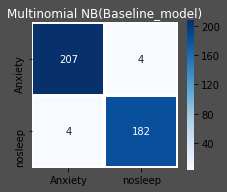

In [75]:
fig = plt.figure(figsize=(15,17))
fig.set_facecolor('#4F4F4F')
plt.subplot(5,4,1)
conf_matrix = confusion_matrix(nb_pred,y_test)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
xticklabels=["Anxiety","nosleep"],
yticklabels=["Anxiety","nosleep"],
linewidths = 2,linecolor = "w",cmap = "Blues")
plt.title('Multinomial NB(Baseline_model)',color = "w")
plt.subplots_adjust(wspace = .2,hspace = .3)

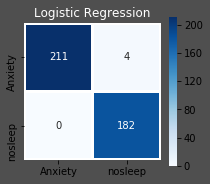

In [76]:
fig = plt.figure(figsize=(15,17))
fig.set_facecolor('#4F4F4F')
plt.subplot(5,4,1)
predictions = pipe1.predict(X_test)
conf_matrix = confusion_matrix(lr_pred,y_test)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
xticklabels=["Anxiety","nosleep"],
yticklabels=["Anxiety","nosleep"],
linewidths = 2,linecolor = "w",cmap = "Blues")
plt.title('Logistic Regression',color = "w")
plt.subplots_adjust(wspace = .3,hspace = .3)

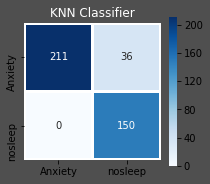

In [77]:
fig = plt.figure(figsize=(15,17))
fig.set_facecolor('#4F4F4F')
plt.subplot(5,4,1)
conf_matrix = confusion_matrix(knn_pred,y_test)
sns.heatmap(conf_matrix,annot=True,fmt = "d",square = True,
xticklabels=["Anxiety","nosleep"],
yticklabels=["Anxiety","nosleep"],
linewidths = 2,linecolor = "w",cmap = "Blues")
plt.title('KNN Classifier',color = "w")
plt.subplots_adjust(wspace = .3,hspace = .3)